In [83]:
import cv2
import matplotlib.pyplot as plt
print(cv2.__version__)

4.8.1


In [84]:
# load an image
img=cv2.imread("images/mp10.jpg")
img=cv2.resize(img,(600,480))
cv2.imshow("original image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Gray Scale Image

Typically a 8 bit image which means the pixel values of each position lies between 0 to 255. 0 means black and 255 represents white. The other values from 1 to 254 represents different shades of gray.

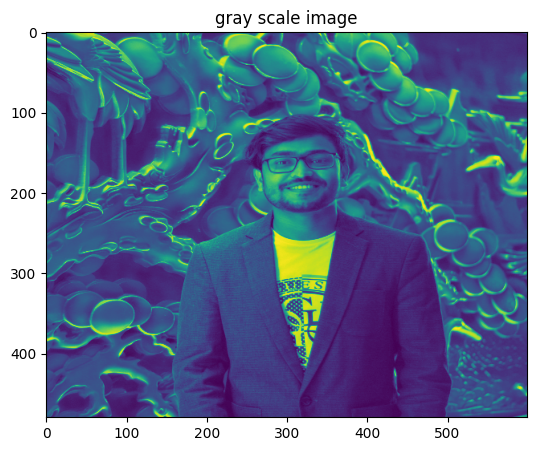

In [85]:
img_Gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow("gray scale image",img_Gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

# plotting using matplot

plt.figure(figsize=(10,5))
plt.imshow(img_Gray)
plt.title("gray scale image")
plt.show()


#### Gaussian Blur 

Gaussian blur is a type of image-blurring filter that uses a Gaussian function to calculate the weights of the neighboring pixels in the convolution operation. This filter is often applied to reduce noise and detail in an image, resulting in a smoother appearance.

The Gaussian function, also known as the bell curve, is defined by the equation:

$G(x, y) = A \cdot \exp\left(-\frac{x^2 + y^2}{2 \cdot \sigma^2}\right)$

- x and y are the distances from the center of the kernel (filter).
- A is a normalization constant to ensure that the sum of all the weights is equal to 1.
- σ is the standard deviation of the Gaussian distribution, controlling the spread or width of the bell curve.


The Gaussian blur is applied by convolving the image with a Gaussian kernel. The convolution operation involves sliding the kernel over the image and calculating the weighted average of the neighboring pixels at each position. The weights are determined by the values of the Gaussian function.

The effect of the Gaussian blur is to reduce high-frequency noise and details in the image while preserving the overall structure and important features. It's commonly used in image preprocessing, such as smoothing before edge detection or reducing noise in images.





In [86]:
import numpy as np
import matplotlib.pyplot as plt


(-0.5, 599.5, 479.5, -0.5)

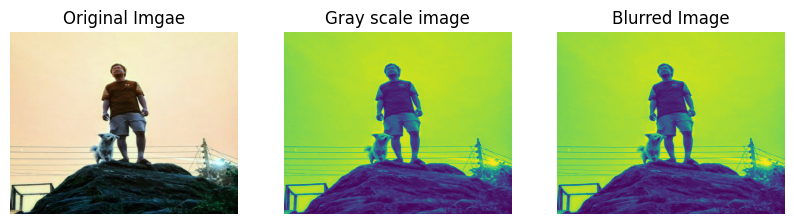

In [87]:
img=cv2.imread('images/mypic1.jpg')
img=cv2.resize(img,(600,480))
kernal_size=5
sigma=.1
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blurred_img=cv2.GaussianBlur(gray_img,(kernal_size,kernal_size),sigma)
cv2.imshow("Original Image",img)
cv2.imshow("gray scale image",gray_img)
cv2.imshow("blurred image",blurred_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
## plotting the images side by side
plt.figure(figsize=(10,5))

# ogiginal image
plt.subplot(1,3,1) # (row,column, position)
plt.title("Original Imgae")
plt.imshow(img)
plt.axis('off')

#blurrd image
plt.subplot(1,3,2)
plt.title("Gray scale image")
plt.imshow(gray_img)
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Blurred Image")
plt.imshow(blurred_img)
plt.axis('off')

#### Canny Edge detection
Cannyh edge detection technique is a widely used computer vision techniques for detecting edges in iamges. The Canny edge detector is known for its ability to detect edges while minimizing noise.

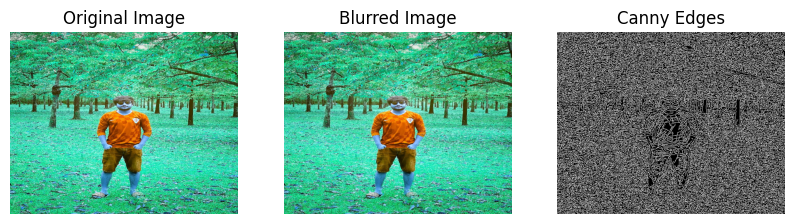

In [88]:
img=cv2.imread("images/mp9.jpg")
img=cv2.resize(img,(600,480))
blurred_img=cv2.GaussianBlur(img,(7,7),.4)
canny_edges=cv2.Canny(blurred_img,50,100)
cv2.imshow("original image",img)
cv2.imshow("Blurred image",blurred_img)
cv2.imshow("Edges",canny_edges)
cv2.waitKey(0)
cv2.destroyAllWindows()



# applying canny edge detection
'''before applying canny edge detection we apply gausian blurr
 to improve edge detection'''
plt.figure(figsize=(10,5))

# Original image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

# Blurred image
plt.subplot(1, 3, 2)
plt.title("Blurred Image")
plt.imshow(blurred_img, cmap="gray")
plt.axis("off")

# Canny edges
plt.subplot(1, 3, 3)
plt.title("Canny Edges")
plt.imshow(canny_edges, cmap="gray")
plt.axis("off")

plt.show()


- Low Threshold (50): Edges with gradient values below this threshold will be discarded. These are considered weak edges.

- High Threshold (150): Edges with gradient values above this threshold will be considered strong edges.

#### Errosion and Dilation
These are two morphological image processing techniques where errosion refers to shrinking and dilation refers to expanding the object of the input input image. Both techniques are applied on binary image (0/1 or 0/255). 0 represents backgrounds and 1 represents foreground. We do these with the help of kernel/Structuring element. So there are two segments.
- Image segment say, A
- structuring element say, B

**Dilation**: If we want to expand the boundary of the object we apply dilation. The operation is defined by a structuring element, which is a small binary image (kernel) that slides through the input image. For each pixel in the input image, the corresponding pixel in the output image is set to 1 if at least one pixel in the structuring element is 1 and is located at the same position relative to the center of the structuring element.

Mathematically, the dilation of an image A by a structuring element B is denoted as A⊕B, and it is defined as:
$$
(A \oplus B)(x, y) = \bigcup_{(i, j) \in B} A(x + i, y + j)
$$


Here, (x,y) represents the coordinates of a pixel in the input image, (i,j) represents the coordinates of a pixel in the structuring element, and ⋃ denotes the union operation

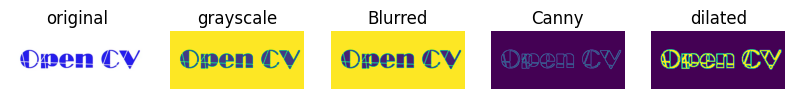

In [89]:
img=cv2.imread("images/dilation2.PNG")
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blurred_img=cv2.GaussianBlur(gray_img,(7,7),.5)
canny_edges=cv2.Canny(blurred_img,50,150)
# kernel
k=np.ones((5,5),np.uint8)
#dilation
dilated_img=cv2.dilate(canny_edges,kernel=k,iterations=1)

cv2.imshow("original Image",img)
cv2.imshow("gray scale image",gray_img)
cv2.imshow("Blurred",blurred_img)
cv2.imshow("Canny image",canny_edges)
cv2.imshow("dilated image",dilated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# plotting

plt.figure(figsize=(10,5))

#original iamge
plt.subplot(1,5,1)
plt.title("original")
plt.imshow(img)
plt.axis("off")


#original iamge
plt.subplot(1,5,2)
plt.title("grayscale")
plt.imshow(gray_img)
plt.axis("off")

#gray
plt.subplot(1,5,3)
plt.title("Blurred")
plt.imshow(blurred_img)
plt.axis("off")

#blurred
plt.subplot(1,5,4)
plt.title("Canny")
plt.imshow(canny_edges)
plt.axis("off")
#canny edges
plt.subplot(1,5,5)
plt.title("dilated")
plt.imshow(dilated_img)
plt.axis("off")


plt.show()



**erosion**
The erosion is opposite of dilation that means the goal is to shrink the boundary of object of a image. The operation involves moving a structuring element (a small binary image or kernel) over the input image and determining the minimum pixel value within the region of the structuring element at each position.

The erosion operation is mathematically defined as follows:

$$
(A \ominus B)(x, y) = \bigcap_{(i, j) \in B} A(x + i, y + j)
$$


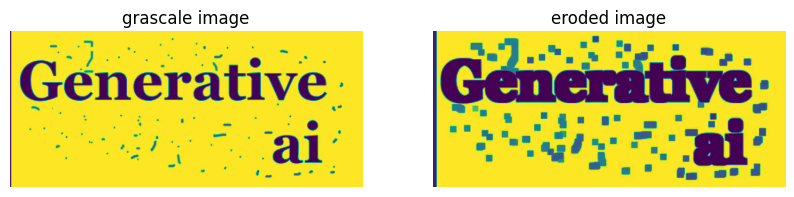

In [90]:
img=cv2.imread("images/dilation1.PNG")
#convert to binary image
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
k = np.ones((5, 5), np.uint8)
eroded_img=cv2.erode(gray_img,k,iterations=2)
cv2.imshow("original file",gray_img)
cv2.imshow("eroded image",eroded_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#plotting the images using matplotlib

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("grascale image")
plt.imshow(gray_img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("eroded image")
plt.imshow(eroded_img)
plt.axis("off")

plt.show()

 